# Github Link


In [324]:
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

In [325]:
cwd = os.getcwd()
print(f'Current working directory is {cwd}')

Current working directory is c:\Users\fengm\Documents\DSA4262


In [326]:
# Import data
df1 = pd.read_csv('./data/mental-heath-in-tech-2016_20161114.csv')
df2 = pd.read_csv('./data/sgindustries.csv', header=0, index_col=0)

In [327]:
# df1.info()

## Macro plot
How many surveyees have or suspect themselves to have mental health problems?

In [328]:
#Check for nulls and value types
cols =  [df1.columns[47], df1.columns[55]]
for col in cols:
   print(f"{col}: {df1[col].unique()}")
   df1[col].info()


Do you currently have a mental health disorder?: ['No' 'Yes' 'Maybe']
<class 'pandas.core.series.Series'>
RangeIndex: 1433 entries, 0 to 1432
Series name: Do you currently have a mental health disorder?
Non-Null Count  Dtype 
--------------  ----- 
1433 non-null   object
dtypes: object(1)
memory usage: 11.3+ KB
What is your age?: [ 39  29  38  43  42  30  37  44  28  34  35  52  32  25  31  26  33  27
  36  40  46  41  45  19  21  24  17  23  22  51  48  55  50  49  20  54
  47  56  57  63  99  61 323  62  53  58   3  66  59  15  65  74  70]
<class 'pandas.core.series.Series'>
RangeIndex: 1433 entries, 0 to 1432
Series name: What is your age?
Non-Null Count  Dtype
--------------  -----
1433 non-null   int64
dtypes: int64(1)
memory usage: 11.3 KB


In [329]:
# Create bins
bins = [20, 30, 40, 50, 60, 70, 80]

#Labels for bins
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

#Categorise to age-group
df1['age_group'] = pd.cut(df1.iloc[:,55], bins=bins, labels=labels, right=False)

# Subset new df for the graph
disorder_age_df = df1.iloc[:,[47,63]].copy()

# Aggregate the responses into counts
pivot_df = disorder_age_df.pivot_table(index=disorder_age_df.columns[0], columns='age_group', aggfunc='size').reindex(['Yes', 'Maybe', 'No']).transpose()

pivot_df.head()

C:\Users\fengm\AppData\Local\Temp\ipykernel_60272\3244605623.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = disorder_age_df.pivot_table(index=disorder_age_df.columns[0], columns='age_group', aggfunc='size').reindex(['Yes', 'Maybe', 'No']).transpose()


Do you currently have a mental health disorder?,Yes,Maybe,No
age_group,,,
20-29,184,102,157
30-39,269,149,260
40-49,92,61,82
50-59,21,12,24
60-69,6,1,2


<Axes: title={'center': "IT professionals' self-assessments of mental health disorders, by age group"}, xlabel='Age Group', ylabel='Number of responses'>

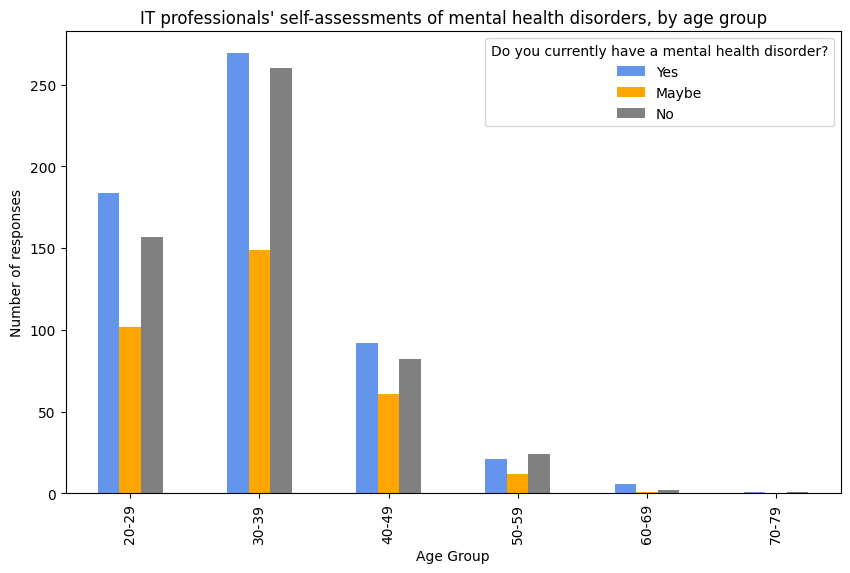

In [330]:
#Plot bar chart 
color_dict = {'Yes': 'cornflowerblue', 'Maybe': 'orange', 'No': 'grey'}
pivot_df.plot(kind='bar', figsize=(10,6), color=color_dict, xlabel = 'Age Group', ylabel= 'Number of responses',title="IT professionals' self-assessments of mental health disorders, by age group")

# plt.show()

## Micro plot

What could be the reason behind why there are so many people who suspect they have a mental health disorder?

In [331]:
#Choose only the 3 relavant columns
micro_df = df1.iloc[:,[40,41,47]].copy()

#Extract the original column headers
questions = micro_df.columns
#Filter only 'maybe' responses
micro_df = micro_df[micro_df.iloc[:,2]=='Maybe']
#Drop 3rd column
micro_df = micro_df.drop(micro_df.columns[2], axis=1)

#Merge all no and yes answers
for col in micro_df.columns:
    micro_df.loc[micro_df[col].str.contains('Yes', case=False, na=False), col] = 'Yes'
    micro_df.loc[micro_df[col].str.contains('No', case=False, na=False), col] = 'No'

#Create count table for each column
count_df = pd.crosstab(micro_df.iloc[:,0], micro_df.iloc[:,1]).reindex(['Yes', 'Maybe', 'No'], axis=0).reindex(['Yes', 'Maybe', 'No'], axis=1)
count_df.head()


Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Yes,Maybe,No
Do you feel that being identified as a person with a mental health issue would hurt your career?,,,
Yes,102,40,14
Maybe,17,89,29
No,0,13,23


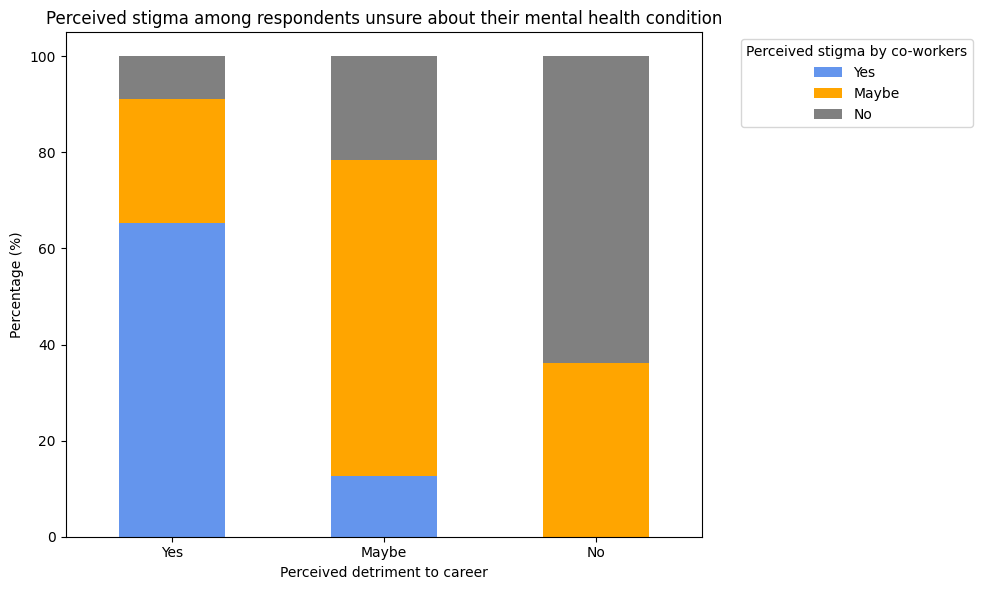

In [332]:
#Find IT percent
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked percent bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0, color=color_dict)
plt.title("Perceived stigma among respondents unsure about their mental health condition")
plt.ylabel("Percentage (%)")
plt.xlabel("Perceived detriment to career")
plt.legend(title="Perceived stigma by co-workers", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Actionable plot
What can we do in Singapore to address this issue?

In [333]:
#Sanitise index labels
df2.index = df2.index.str.strip()

#Find percent of people in IT sector
df2_mod = df2.copy()
df2_mod = df2_mod.sort_index(axis=1, ascending=True)
df2_mod.loc['it_percent'] = df2_mod.loc['Information & Communications'] / df2_mod.loc['Employed Residents Aged 30 - 39 Years'] * 100

df2_mod.tail()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Health & Social Services,13.700000,15.70000,15.800000,15.900000,16.500000,16.20000,17.600000,18.300000,19.000000,19.40000,...,27.500000,31.200000,32.900000,34.000000,35.800000,44.30000,42.200000,48.700000,50.100000,55.300000
"Arts, Entertainment & Recreation",5.400000,2.90000,3.400000,3.200000,4.100000,4.60000,4.600000,4.500000,5.300000,5.10000,...,9.500000,10.000000,8.800000,8.900000,9.800000,10.10000,8.400000,9.100000,9.700000,9.800000
"Other Community, Social & Personal Services",13.600000,15.20000,14.800000,13.400000,12.800000,14.10000,12.500000,12.100000,13.700000,14.40000,...,11.200000,11.200000,12.300000,13.700000,11.700000,15.00000,14.300000,13.100000,13.100000,13.800000
Others,3.000000,4.50000,4.800000,5.200000,5.000000,4.50000,5.700000,4.600000,6.100000,4.80000,...,4.500000,4.800000,4.800000,5.500000,4.900000,5.70000,5.900000,5.900000,6.000000,5.800000
it_percent,4.278542,6.04534,5.723337,6.392887,6.023835,5.63792,6.825297,7.653806,6.949807,8.11359,...,5.910117,5.974905,6.035003,6.761566,6.945525,7.21831,7.743682,8.109091,8.354476,7.923789


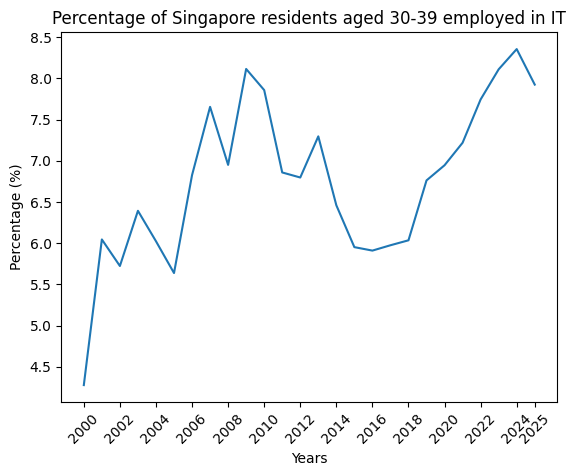

In [334]:
#Plot linechart of percentage of IT workers

plt.plot(df2_mod.columns, df2_mod.loc['it_percent'])
plt.xticks(rotation=45)
#Append last xtick
tick_positions = list(range(0, len(df2_mod.columns), 2))
if (len(df2_mod.columns) - 1) not in tick_positions:
    tick_positions.append(len(df2_mod.columns) - 1)
#Show every 2 xticks
plt.xticks(ticks=tick_positions)
plt.title("Percentage of Singapore residents aged 30-39 employed in IT")
plt.ylabel("Percentage (%)")
plt.xlabel("Years")
plt.show()